In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout
from keras.utils import np_utils
from keras.models import Sequential, Model

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('../train.csv')
data = ds.values[:10000]

In [3]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(10000, 784) (10000, 10)


In [4]:
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(8000, 28, 28, 1) (8000, 10)
(2000, 28, 28, 1) (2000, 10)


In [5]:
model = Sequential()
act = 'relu'

model.add(Conv2D(64, 3, input_shape=(28, 28, 1)))
model.add(Activation(act))

model.add(Conv2D(32, 3))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation(act))

model.add(Conv2D(8, 5))
model.add(Activation(act))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.42))
model.add(Activation(act))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           6408      
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 8)           0         
__________

In [6]:
hist = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test),
                verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
14s - loss: 0.8929 - acc: 0.7123 - val_loss: 0.2558 - val_acc: 0.9125
Epoch 2/10
14s - loss: 0.2807 - acc: 0.9123 - val_loss: 0.1609 - val_acc: 0.9500
Epoch 3/10
15s - loss: 0.1890 - acc: 0.9450 - val_loss: 0.1204 - val_acc: 0.9580
Epoch 4/10
14s - loss: 0.1486 - acc: 0.9557 - val_loss: 0.0984 - val_acc: 0.9695
Epoch 5/10
14s - loss: 0.1104 - acc: 0.9653 - val_loss: 0.0860 - val_acc: 0.9735
Epoch 6/10
14s - loss: 0.0909 - acc: 0.9723 - val_loss: 0.0819 - val_acc: 0.9720
Epoch 7/10
14s - loss: 0.0785 - acc: 0.9753 - val_loss: 0.0847 - val_acc: 0.9750
Epoch 8/10
14s - loss: 0.0691 - acc: 0.9788 - val_loss: 0.0827 - val_acc: 0.9760
Epoch 9/10
14s - loss: 0.0566 - acc: 0.9823 - val_loss: 0.0816 - val_acc: 0.9785
Epoch 10/10
14s - loss: 0.0527 - acc: 0.9830 - val_loss: 0.0692 - val_acc: 0.9790


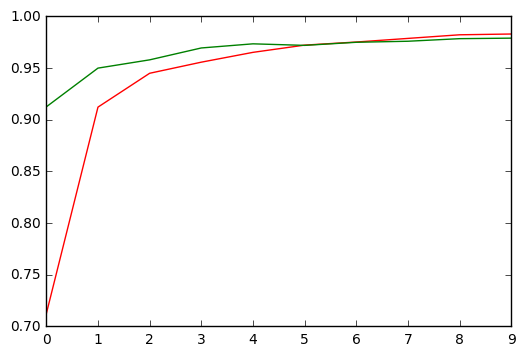

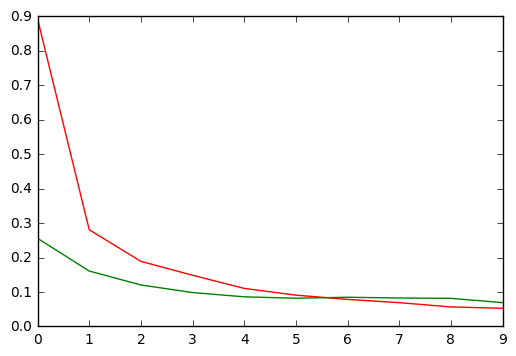

In [7]:
h = hist.history

plt.figure(0)
plt.plot(h['acc'], 'r')
plt.plot(h['val_acc'], 'g')

plt.figure(1)
plt.plot(h['loss'], 'r')
plt.plot(h['val_loss'], 'g')

plt.show()

In [8]:
model.layers

In [20]:
m = Model(inputs=model.input, outputs=model.layers[5].output)
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           6408      
Total para

(1, 8, 8, 8)


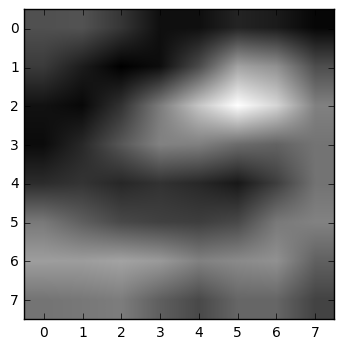

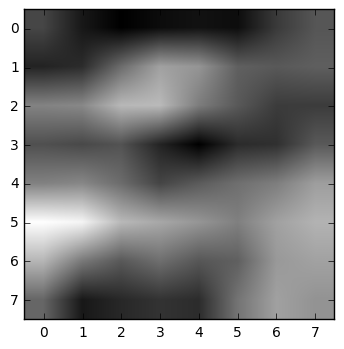

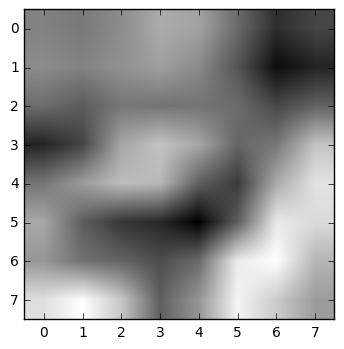

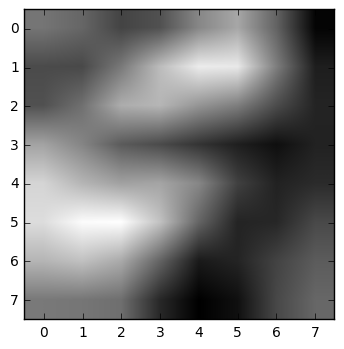

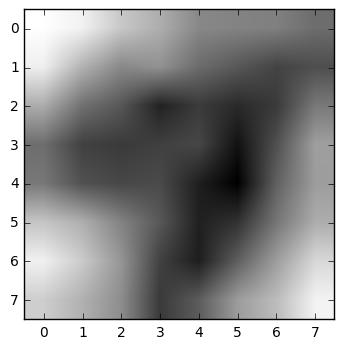

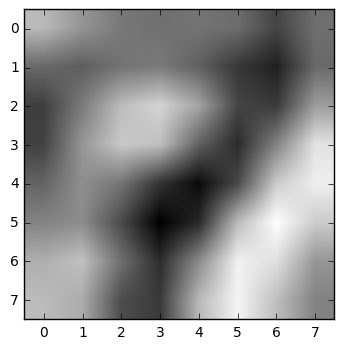

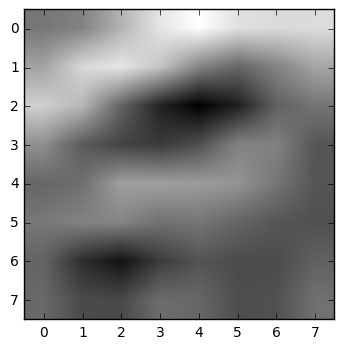

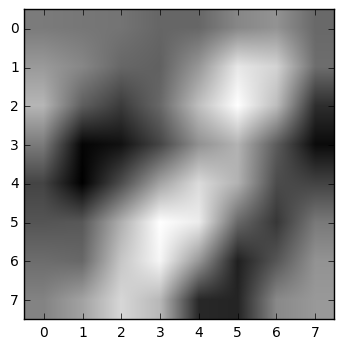

In [21]:
out = m.predict(X_train[100, :, :, :].reshape((-1, 28, 28, 1)))
print out.shape

for ix in range(8):
    plt.figure(ix)
    plt.imshow(out[:, :, :, ix].reshape((8, 8)), cmap='gray')

plt.show()